In [1]:
#!pip install opencv-python
#!pip install pandas
#!pip install matplotlib

# Load dataset
- Sets the data directory path to ../data/, where image folders are stored.
- Uses glob to collect file paths of all .png images in each class subfolder:
    - "Healthy/"
    - "Moderate DR/"
    - "Severe DR/"
- Counts and prints the number of images found in each class folder.

In [6]:
import os
from glob import glob
import cv2  

# Define the data path
DATA_PATH = "../data/"

# Create lists of image paths for each class
healthy_images = glob(os.path.join(DATA_PATH, "Healthy", "*.png"))
moderate_images = glob(os.path.join(DATA_PATH, "Moderate DR", "*.png"))
severe_images = glob(os.path.join(DATA_PATH, "Severe DR", "*.png"))

# Print the number of images per category
print(f"Healthy images: {len(healthy_images)}")
print(f"Moderate DR images: {len(moderate_images)}")
print(f"Severe DR images: {len(severe_images)}")

Healthy images: 1000
Moderate DR images: 900
Severe DR images: 480


# Describe Dataset
- Lists the class names: "Healthy", "Moderate DR", and "Severe DR".
- Loops through each class folder:
    - Finds all .png images using glob.
    - Reads each image using OpenCV (cv2.imread).
    - Extracts image dimensions (height and width).
    - Collects file path, label, height, and width in a list called data.
    - Added a warning if any image cannot be read.
- Creates a DataFrame from the collected data with columns: filepath, label, height, width.
- Prints summary descriptive statistics:
    - Total number of readable images.
    - Number of images in each class (value_counts()).
    - Unique image dimension counts using Counter.

In [9]:
import pandas as pd
from collections import Counter

# List all class folders
classes = ["Healthy", "Moderate DR", "Severe DR"]

# Gather image paths, labels, and sizes
data = []
image_sizes = []

for label in classes:
    paths = glob(os.path.join(DATA_PATH, label, "*.png"))
    for p in paths:
        img = cv2.imread(p)
        if img is not None:
            h, w = img.shape[:2]
            image_sizes.append((h, w))
            data.append((p, label, h, w))
        else:
            print(f"Warning: Could not read {p}")

# Create a DataFrame
df = pd.DataFrame(data, columns=["filepath", "label", "height", "width"])

# Display basic info
print("Total images:", len(df))
print("\nClass distribution:\n", df["label"].value_counts())

# Count and display unique image dimensions
dim_counts = Counter(image_sizes)
print("\nImage dimension distribution (Height x Width):")
for (h, w), count in dim_counts.items():
    print(f"{h}x{w}: {count} images")

Total images: 2380

Class distribution:
 label
Healthy        1000
Moderate DR     900
Severe DR       480
Name: count, dtype: int64

Image dimension distribution (Height x Width):
256x256: 2380 images


# Describe Dataset: Sample Images
- Defines a function show_sample_images() to display example images from each class.
    - df: A DataFrame with image file paths (filepath) and labels (label).
    - classes: A list of class names (e.g., "Healthy", "Moderate DR", "Severe DR").
    - samples_per_class: Number of images to show for each class (default = 3).
- For each class:
    - Selects samples_per_class random images.
    - Reads and converts the image color from BGR to RGB (for correct display).
    - Plots the image using plt.imshow() with class name as the title.
    - Displays all selected images in a grid layout with plt.tight_layout().

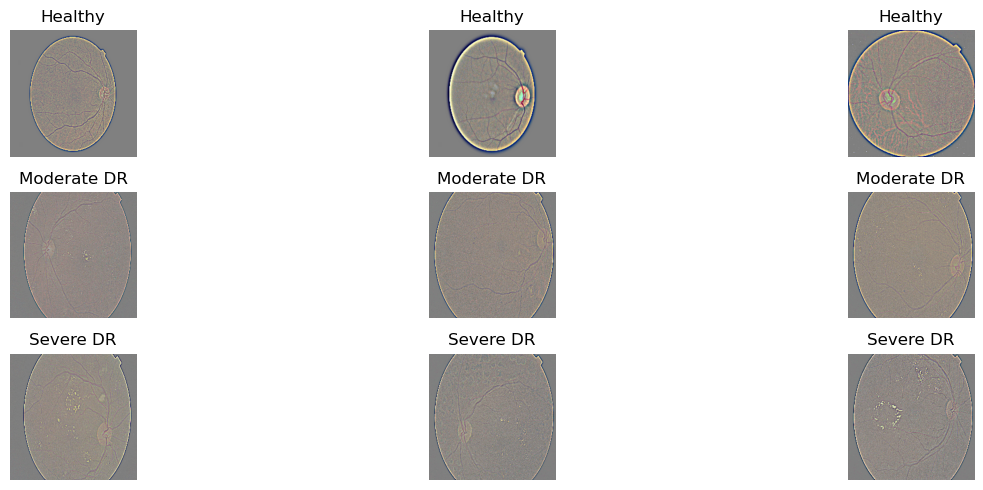

In [12]:
import matplotlib.pyplot as plt
import random

# function to show images in a grid
'''
Arguments:
df: the DataFrame with columns "filepath" and "label".
classes: a list of class names.
samples_per_class: how many images to show per class.
'''
def show_sample_images(df, classes, samples_per_class=3):
    plt.figure(figsize=(15, 5))
    for idx, label in enumerate(classes):
        class_images = df[df["label"] == label]["filepath"].tolist()
        selected_images = random.sample(class_images, samples_per_class)
        for i, img_path in enumerate(selected_images):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(len(classes), samples_per_class, idx * samples_per_class + i + 1)
            plt.imshow(img)
            plt.title(label)
            plt.axis("off")
    plt.tight_layout()
    plt.show()

# Call the function
show_sample_images(df, classes=["Healthy", "Moderate DR", "Severe DR"], samples_per_class=3)


# Setting the Random Seed: Code for Reproducibility of Results

In [14]:
import random
import numpy as np
import os
import tensorflow as tf

# Set a global seed value
SEED = 1990

# Python built-in random
random.seed(SEED)

# Numpy
np.random.seed(SEED)

# Ensure Python hash-based operations are deterministic
os.environ["PYTHONHASHSEED"] = str(SEED)

# For TensorFlow (if using deep learning later)
try:
    import tensorflow as tf
    tf.random.set_seed(SEED)
except ImportError:
    pass  # Skip if TensorFlow is not installed

# For PyTorch (if applicable)
try:
    import torch
    torch.manual_seed(SEED)
    torch.cuda.manual_seed(SEED)
    torch.cuda.manual_seed_all(SEED)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
except ImportError:
    pass  # Skip if PyTorch is not installed

In [52]:
#!pip install scikit-learn

# Train-test-validation split (80:10:10)
- Splits the dataset into train (80%), validation (10%), and test (10%) with stratification
- Prints the number of images in each set by class

In [20]:
from sklearn.model_selection import train_test_split

# Step 1: Split into train (80%) and temp (20%)
train_df, temp_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df["label"],
    random_state=1990
)

# Step 2: Split temp into val (10%) and test (10%)
val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    stratify=temp_df["label"],
    random_state=1990
)

# Step 3: Print number of images in each set
print("🔹 Train set distribution:")
print(train_df["label"].value_counts())
print(f"Total train images: {len(train_df)}\n")

print("🔹 Validation set distribution:")
print(val_df["label"].value_counts())
print(f"Total validation images: {len(val_df)}\n")

print("🔹 Test set distribution:")
print(test_df["label"].value_counts())
print(f"Total test images: {len(test_df)}\n")


🔹 Train set distribution:
label
Healthy        800
Moderate DR    720
Severe DR      384
Name: count, dtype: int64
Total train images: 1904

🔹 Validation set distribution:
label
Healthy        100
Moderate DR     90
Severe DR       48
Name: count, dtype: int64
Total validation images: 238

🔹 Test set distribution:
label
Healthy        100
Moderate DR     90
Severe DR       48
Name: count, dtype: int64
Total test images: 238



In [18]:
#!pip install keras
#!pip install tensorflow

# Data Pre-processing and Augmentation 

| Set              | Purpose                                      | Augmentations Applied        |
|------------------|----------------------------------------------|-------------------------------|
| `train_generator`| Used to train the model                      | Small rotations, shifts, zoom |
| `val_generator`  | Used to evaluate on validation data during training | No augmentation (rescale only) |
| `test_generator` | Used to evaluate final model performance     | No augmentation (rescale only) |

- Augmentations (small rotations, shifts, zoom) are applied only to training data, which helps improve generalization without distorting important medical features.
- Rescaling transforms pixel values from [0, 255] to [0, 1] across all sets.
- No shuffling is used in validation or test sets to maintain data-label alignment during evaluation and reporting.
- IMAGE_SIZE = (224, 224): Standardized Input for CNNs: Many pretrained models (e.g., ResNet, VGG, EfficientNetB0) are trained on 224×224 pixel images. Using this size ensures compatibility.
- Batch_size = 32: It allows for:
    - Faster gradient computation than very small batches (e.g., 8), 
    - More stable training than large batches (e.g., 128+), which can require tuning learning rates more carefully
    - Works well with most mid-range GPUs (like NVIDIA T4, 3060, 3080) without running out of memory.

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define target image size and batch size for model input
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# -------------------- 1. Data Augmentation for Training --------------------
# Create an ImageDataGenerator for training with safe augmentations for ophthalmology images
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize pixel values to [0, 1]
    rotation_range=10,           # Small random rotations (±10°)
    width_shift_range=0.05,      # Horizontal shift up to 5%
    height_shift_range=0.05,     # Vertical shift up to 5%
    zoom_range=0.05,             # Zoom in/out by up to 5%
    fill_mode='nearest'          # Fill pixels after transformation with nearest neighbors
)

# -------------------- 2. Normalization Only for Validation & Test --------------------
# No augmentation here — only rescaling to keep evaluation consistent
val_test_datagen = ImageDataGenerator(rescale=1./255)

# -------------------- 3. Create Training Generator --------------------
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,               # DataFrame with training image paths and labels
    x_col="filepath",                 # Column in DataFrame containing image paths
    y_col="label",                    # Column with class labels
    target_size=IMAGE_SIZE,          # Resize all images to 224x224
    batch_size=BATCH_SIZE,           # Process images in batches of 32
    class_mode="categorical",        # Multi-class classification (one-hot labels)
    shuffle=True,                    # Shuffle data each epoch for better training
    seed=SEED                        # Ensures reproducibility of shuffling
)

# -------------------- 4. Create Validation Generator --------------------
val_generator = val_test_datagen.flow_from_dataframe(
    dataframe=val_df,                # DataFrame with validation data
    x_col="filepath",
    y_col="label",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False                    # No shuffling — keep data order fixed
)

# -------------------- 5. Create Test Generator --------------------
test_generator = val_test_datagen.flow_from_dataframe(
    dataframe=test_df,               # DataFrame with test data
    x_col="filepath",
    y_col="label",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False                    # No shuffling — so predictions match original labels
)


Found 1904 validated image filenames belonging to 3 classes.
Found 238 validated image filenames belonging to 3 classes.
Found 238 validated image filenames belonging to 3 classes.


### CNN Architecture Summary

| Layer Block        | Layer Type          | Purpose                                          |
|--------------------|---------------------|--------------------------------------------------|
| Input              | Input (224×224×3)   | Accept RGB image input                          |
| Conv Block 1       | Conv2D + BN + Pool  | Detect low-level features (edges, blobs)        |
| Conv Block 2       | Conv2D + BN + Pool  | Capture mid-level features                      |
| Conv Block 3       | Conv2D + BN + Pool  | Learn high-level patterns (e.g., lesions)       |
| Dense Block        | Flatten + Dense     | Classify based on learned patterns              |
| Regularization     | Dropout (0.5)       | Prevent overfitting                             |
| Output             | Dense (softmax)     | Predict probabilities for 3 classes             |


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input

# Initialize a Sequential model — stack layers linearly
model = Sequential([

    # Input layer specifying the shape of the images (224x224 RGB)
    Input(shape=(224, 224, 3)),

    # ----- First Convolutional Block -----
    Conv2D(32, (3, 3), activation='relu'),   # 32 filters, 3x3 kernel, ReLU activation
    BatchNormalization(),                    # Normalize activations for faster convergence
    MaxPooling2D(2, 2),                      # Reduce spatial dimensions by half (112x112)

    # ----- Second Convolutional Block -----
    Conv2D(64, (3, 3), activation='relu'),   # 64 filters
    BatchNormalization(),
    MaxPooling2D(2, 2),                      # Output shape: 56x56

    # ----- Third Convolutional Block -----
    Conv2D(128, (3, 3), activation='relu'),  # 128 filters
    BatchNormalization(),
    MaxPooling2D(2, 2),                      # Output shape: 28x28

    # ----- Flatten and Fully Connected Layers -----
    Flatten(),                               # Flatten 3D feature maps to 1D vector
    Dense(128, activation='relu'),           # Fully connected layer with 128 units
    Dropout(0.5),                            # Dropout for regularization (50% dropout rate)

    # ----- Output Layer -----
    Dense(3, activation='softmax')           # Final layer for 3-class classification
])

### Summary of model.compile() Parameters

| Parameter           | Value                     | Purpose                                                                 |
|---------------------|---------------------------|-------------------------------------------------------------------------|
| `optimizer`         | `'adam'`                  | Adaptive optimizer for faster and stable convergence                   |
| `loss`              | `'categorical_crossentropy'` | Suitable for one-hot encoded labels in multi-class classification       |
| `metrics`           | `['accuracy']`            | Measures the percentage of correctly predicted samples                 |


In [34]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # because it's multi-class
    metrics=['accuracy']
)

### Summary of Training Configuration

| Component        | Setting/Value                  | Purpose                                                             |
|------------------|--------------------------------|---------------------------------------------------------------------|
| `ModelCheckpoint`| Saves `best_model.keras`       | Saves the best-performing model based on `val_accuracy`             |
| `EarlyStopping`  | Monitors `val_loss`            | Stops training early if model stops improving (patience = 5)        |
| `restore_best_weights` | `True`                   | Ensures the final model is from the best-performing epoch           |
| `epochs`         | 25                             | Maximum training duration (early stopping may halt before that)     |
| `train_generator`| Augmented training images      | Feeds batches of preprocessed & augmented images to the model       |
| `val_generator`  | Normalized validation images   | Monitors generalization during training                             |


In [37]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# ------------------- Callback: Save Best Model -------------------
checkpoint = ModelCheckpoint(
    "../model/best_model.keras",   # Path to save the best model (in Keras format)
    monitor='val_accuracy',        # Monitor validation accuracy during training
    save_best_only=True,           # Only save the model if val_accuracy improves
    verbose=1                      # Print a message when a new best model is saved
)

# ------------------- Callback: Early Stopping --------------------
early_stop = EarlyStopping(
    monitor='val_loss',            # Monitor validation loss
    patience=5,                    # Stop training if val_loss doesn't improve after 5 epochs
    restore_best_weights=True      # Restore the weights of the best epoch
)

# ------------------- Model Training -------------------
history = model.fit(
    train_generator,               # Training data (with augmentation)
    epochs=25,                     # Maximum number of training epochs
    validation_data=val_generator, # Validation data (no augmentation)
    callbacks=[checkpoint, early_stop],  # Apply early stopping and checkpointing
    verbose=1                      # Display progress bar with training logs
)

C:\Users\drthu\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6012 - loss: 8.2840
Epoch 1: val_accuracy improved from -inf to 0.20168, saving model to ../model/best_model.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.6017 - loss: 8.2280 - val_accuracy: 0.2017 - val_loss: 12.9881
Epoch 2/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6427 - loss: 0.9202
Epoch 2: val_accuracy did not improve from 0.20168
60/60 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.6426 - loss: 0.9196 - val_accuracy: 0.2017 - val_loss: 19.0731
Epoch 3/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6308 - loss: 0.8184
Epoch 3: val_accuracy did not improve from 0.20168
60/60 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.6306 - loss: 0.8183 - val_accuracy: 0.2017 - val_loss: 7.9564
Epoch 4/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6569 - loss: 0.7644
Epoch 4: val_accuracy improved from 0.20168 to 0.27311, saving model to ../model/best_model.keras
60/60 ━━━━━━━━━━━━━━━━━━

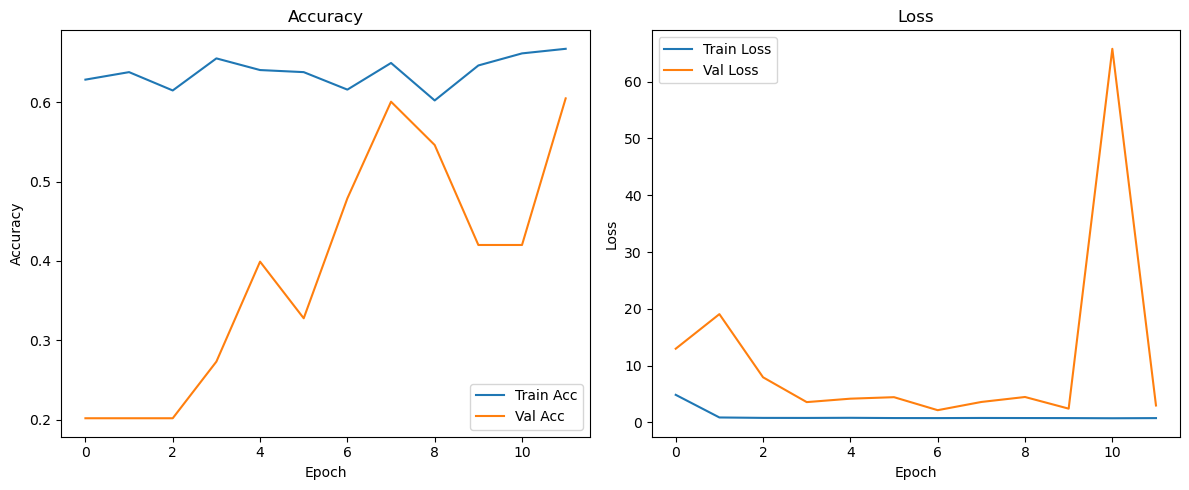

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


- The training and validation plots show how the model learned over time.
- In the accuracy plot, It can be seen that the training accuracy stays consistently high throughout all the epochs, around 65–68%, which means the model is fitting the training data well.
- However, the validation accuracy jumps up and down and doesn’t improve steadily, which is a sign that the model might not be generalizing well to new data.
- In the loss plot, training loss remains very low after the first few epochs, while validation loss drops at first but then suddenly spikes, especially around the 10th epoch.
- This behavior suggests the model is overfitting — learning too much from the training data and struggling to perform on the unseen validation data.

In [43]:
from tensorflow.keras.models import load_model

# ------------------- Load Best Model -------------------
# Load the model that was saved during training by the ModelCheckpoint callback.
# This model has the highest validation accuracy across all epochs.
best_model = load_model("../model/best_model.keras")

# ------------------- Evaluate on Test Set -------------------
# Evaluate the loaded model on the unseen test dataset using the test_generator.
# This returns the loss and accuracy on the test set.
test_loss, test_acc = best_model.evaluate(test_generator)

# ------------------- Print Test Results -------------------
# Print the final evaluation results with formatted output
print(f"\n Best Model - Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

C:\Users\drthu\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 534ms/step - accuracy: 0.6162 - loss: 2.9569

 Best Model - Test Accuracy: 0.6050, Test Loss: 2.9201


In [61]:
#pip install scikit-learn matplotlib seaborn

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step


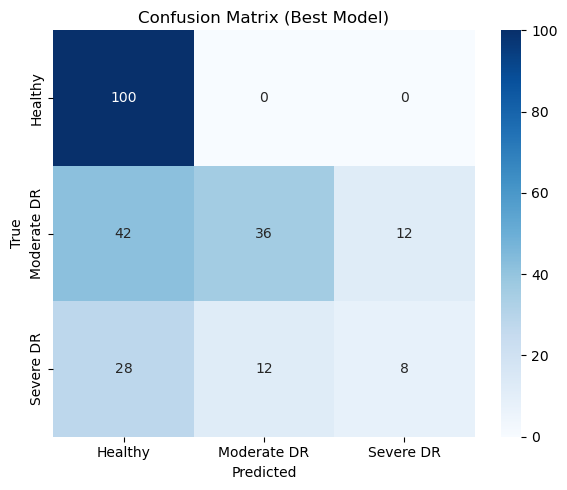


Classification Report (Best Model):

              precision    recall  f1-score   support

     Healthy       0.59      1.00      0.74       100
 Moderate DR       0.75      0.40      0.52        90
   Severe DR       0.40      0.17      0.24        48

    accuracy                           0.61       238
   macro avg       0.58      0.52      0.50       238
weighted avg       0.61      0.61      0.56       238



In [45]:
from tensorflow.keras.models import load_model
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# 1. Load the best model saved during training
best_model = load_model("../model/best_model.keras")

# 2. Predict on the test set
pred_probs = best_model.predict(test_generator)
y_pred = np.argmax(pred_probs, axis=1)

# 3. True labels from the test generator
y_true = test_generator.classes

# 4. Class label names
class_labels = list(test_generator.class_indices.keys())

# 5. Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# 6. Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix (Best Model)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# 7. Classification report
print("\nClassification Report (Best Model):\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

- The classification report and confusion matrix provides the information on how the model performs across different categories. 
- The model is very good at identifying healthy images, with 100% recall (it catches all the healthy cases).
- However, it struggles with the two disease categories, especially Severe Diabetic Retinopathy (Severe DR), where the recall is only 17%, meaning the model misses most of the severe cases.
- Moderate DR also has low recall (40%) and many are wrongly predicted as Healthy. While the precision for Moderate DR is better (75%), the model overall is biased towards predicting the Healthy class.
- This is an important issue in a medical context because it could lead to missing patients who actually have the disease.

# Hyperparameter Tuning of own CNN model

In [56]:
#!pip install keras_tuner

### Summary of `build_model(hp)` Function for Hyperparameter Tuning

| Parameter         | Tuned Values                             | Description                                                  |
|-------------------|-------------------------------------------|--------------------------------------------------------------|
| `conv_blocks`     | 2 to 3                                    | Number of convolutional blocks used                          |
| `filters_i`       | 32 to 128 (step=32)                       | Number of filters in each convolutional layer                |
| `dense_units`     | 64 to 256 (step=64)                       | Number of units in the fully connected dense layer           |
| `dropout`         | 0.3 to 0.6 (step=0.1)                     | Dropout rate used for regularization                         |
| `learning_rate`   | 1e-4, 1e-3, 1e-2                          | Learning rate for the Adam optimizer                         |
| `loss`            | `categorical_crossentropy`               | Used for multi-class classification with one-hot encoding    |
| `metrics`         | `accuracy`                               | Evaluation metric used to monitor model performance          |

This function will be passed to KerasTuner (e.g., RandomSearch or Hyperband) to search for the best combination of hyperparameters based on validation accuracy.

In [58]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam

# Define a model-building function for KerasTuner
def build_model(hp):
    model = Sequential()
    
    # Input layer: specify input image dimensions
    model.add(Input(shape=(224, 224, 3)))

    # Add 2 or 3 convolutional blocks as specified by the tuner
    for i in range(hp.Int("conv_blocks", 2, 3)):
        # Tune the number of filters: 32, 64, 96, or 128
        filters = hp.Int(f"filters_{i}", min_value=32, max_value=128, step=32)

        # Convolutional layer with tuned number of filters
        model.add(Conv2D(filters, (3, 3), activation="relu", padding="same"))

        # Batch normalization to improve training stability
        model.add(BatchNormalization())

        # Max pooling to reduce spatial dimensions
        model.add(MaxPooling2D((2, 2)))

    # Flatten the output from the last conv block
    model.add(Flatten())

    # Tune the number of units in the dense layer
    model.add(Dense(hp.Int("dense_units", 64, 256, step=64), activation="relu"))

    # Tune the dropout rate to reduce overfitting
    model.add(Dropout(hp.Float("dropout", 0.3, 0.6, step=0.1)))

    # Output layer for 3-class classification using softmax
    model.add(Dense(3, activation="softmax"))

    # Tune learning rate and compile the model
    lr = hp.Choice("learning_rate", [1e-4, 1e-3, 1e-2])
    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    
    return model


In [61]:
import keras_tuner as kt

# Initialize a RandomSearch tuner from KerasTuner
tuner = kt.RandomSearch(
    build_model,               # The model-building function to tune (defined earlier)
    
    objective="val_accuracy",  # The metric to optimize (maximize validation accuracy)
    
    max_trials=10,             # Number of different hyperparameter combinations to try
    
    directory="tuning_dir",    # Directory to save tuning results and checkpoints
    
    project_name="retina_cnn_tuning"  # Subfolder name within the directory for this tuning run
)

Reloading Tuner from tuning_dir\retina_cnn_tuning\tuner0.json


In [63]:
tuner.search(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3)],
    verbose=1
)

In [65]:
# Retrieve the best hyperparameter configuration found during the tuning process
# get_best_hyperparameters(n) returns a list of top n trials (we use the best one [0])
best_hps = tuner.get_best_hyperparameters(1)[0]
print("Best hyperparameters:")
print(f"- Conv blocks: {best_hps.get('conv_blocks')}")
print(f"- Filters: {[best_hps.get(f'filters_{i}') for i in range(best_hps.get('conv_blocks'))]}")
print(f"- Dense units: {best_hps.get('dense_units')}")
print(f"- Dropout: {best_hps.get('dropout')}")
print(f"- Learning rate: {best_hps.get('learning_rate')}")

Best hyperparameters:
- Conv blocks: 3
- Filters: [96, 64, 96]
- Dense units: 64
- Dropout: 0.4
- Learning rate: 0.0001


In [67]:
best_tuned_model = tuner.hypermodel.build(best_hps)

history = best_tuned_model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[ModelCheckpoint("../model/best_tuned_model.keras", save_best_only=True, monitor='val_accuracy')],
    verbose=1
)

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 246s 4s/step - accuracy: 0.6438 - loss: 1.2467 - val_accuracy: 0.2017 - val_loss: 5.2371
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 279s 5s/step - accuracy: 0.7025 - loss: 0.6539 - val_accuracy: 0.2017 - val_loss: 7.8703
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 258s 4s/step - accuracy: 0.7249 - loss: 0.6366 - val_accuracy: 0.2017 - val_loss: 7.5406
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 271s 4s/step - accuracy: 0.7242 - loss: 0.6124 - val_accuracy: 0.2017 - val_loss: 5.9188
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 258s 4s/step - accuracy: 0.7269 - loss: 0.5797 - val_accuracy: 0.2269 - val_loss: 3.9368
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 250s 4s/step - accuracy: 0.7354 - loss: 0.5962 - val_accuracy: 0.3866 - val_loss: 1.4835
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 253s 4s/step - accuracy: 0.7369 - loss: 0.5787 - val_accuracy: 0.6218 - val_loss: 0.7963
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 238s 4s/step - accuracy: 0.7121 - loss: 0.5996 - val_accuracy: 0.6429 - v

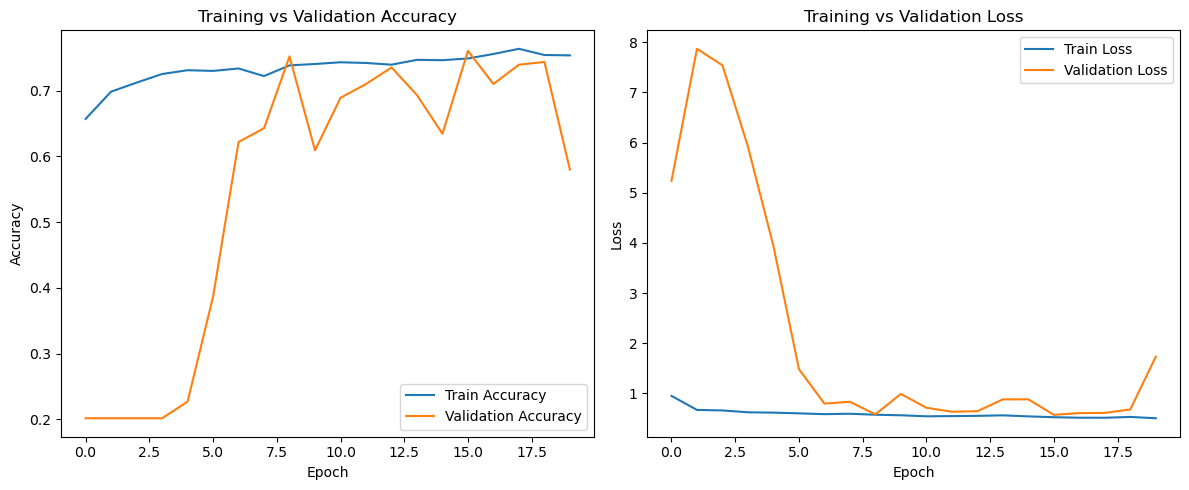

In [69]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


- The training and validation plots of the tuned CNN model show much better learning behavior compared to the original one.
- Training accuracy steadily improves and levels off around 76–77%, while validation accuracy also increases significantly, peaking above 75% for many epochs.
- Although there are still some fluctuations in validation accuracy, it stays within a closer range to training accuracy.
- On the loss side, the validation loss starts high but drops consistently and stabilizes, which is a good sign that the model is learning to generalize better and is no longer severely overfitting.
- The training loss remains low and consistent, indicating that the model is fitting the training data efficiently.

In [71]:
from tensorflow.keras.models import load_model

# Load best model saved by ModelCheckpoint
best_tuned_model = load_model("../model/best_tuned_model.keras")

# Evaluate on test data
test_loss, test_acc = best_tuned_model.evaluate(test_generator)
print(f"\n Best Tuned Model - Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 355ms/step - accuracy: 0.7555 - loss: 0.5691

 Best Tuned Model - Test Accuracy: 0.7563, Test Loss: 0.5642


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 331ms/step


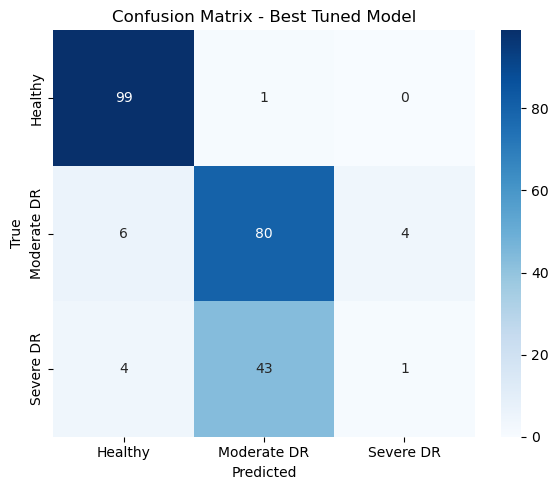


Classification Report:
              precision    recall  f1-score   support

     Healthy       0.91      0.99      0.95       100
 Moderate DR       0.65      0.89      0.75        90
   Severe DR       0.20      0.02      0.04        48

    accuracy                           0.76       238
   macro avg       0.58      0.63      0.58       238
weighted avg       0.67      0.76      0.69       238



In [73]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predict on test data
y_probs = best_tuned_model.predict(test_generator)
y_pred = np.argmax(y_probs, axis=1)

# True labels
y_true = test_generator.classes

# Class names (e.g., ['Healthy', 'Moderate DR', 'Severe DR'])
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title("Confusion Matrix - Best Tuned Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))


- The confusion matrix and classification report indicate a significant improvement in performance.
- The model continues to perform very well on the Healthy class with a 99% recall and a high precision of 91%.
- For Moderate DR, both precision (0.65) and recall (0.89) show solid gains, meaning the model is correctly identifying most Moderate DR cases.
- However, the Severe DR class still has very poor performance, with only 2% recall and 20% precision — meaning it's rarely detected and often misclassified as Moderate DR.
- The overall accuracy of the model is 76%, which is a substantial improvement from the base model's 61%.

#### Comparison with the Base Model
- Compared to the base CNN model, the tuned version shows improved generalisation and classification performance, especially for the Moderate DR class.
- The training and validation accuracy curves are much more stable, and the loss plots suggest that the model is no longer overfitting heavily.
- The accuracy jumped from 61% to 76%, and the F1-score for Moderate DR rose from 0.52 to 0.75.
- However, both models still struggle with the Severe DR class.
- While the tuned model performs better overall, it still requires further refinement through techniques like class balancing, more targeted data augmentation, or incorporating domain-specific pre-trained models to better recognise severe cases.

## Application of Explainale AI (Grad-CAM) for the tuned own CNN

In [110]:
for layer in best_tuned_model.layers:
    if 'conv2d' in layer.name:
        config = layer.get_config()
        filters = config['filters']
        print(f"{layer.name}: filters={filters}")


conv2d_3: filters=96
conv2d_4: filters=64
conv2d_5: filters=96


In [114]:
for layer in best_tuned_model.layers:
    if 'dense' in layer.name:
        config = layer.get_config()
        units = config['units']
        print(f"{layer.name}: units={units}")


dense_2: units=64
dense_3: units=3


✅ Weights transferred successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


C:\Users\drthu\anaconda3\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_421']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)



Grad-CAM for class: Healthy


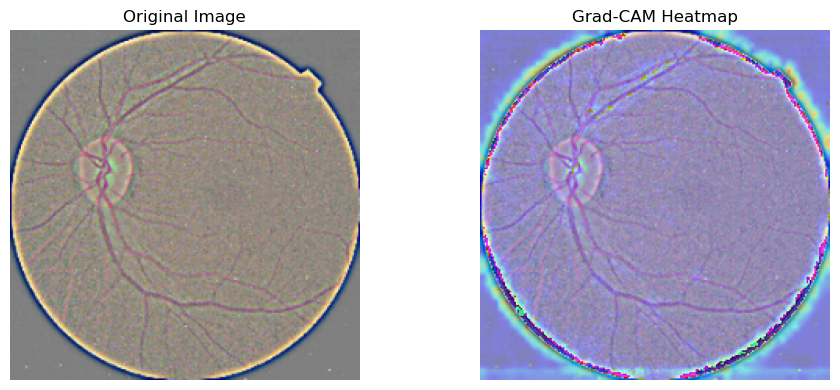

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step

Grad-CAM for class: Moderate DR


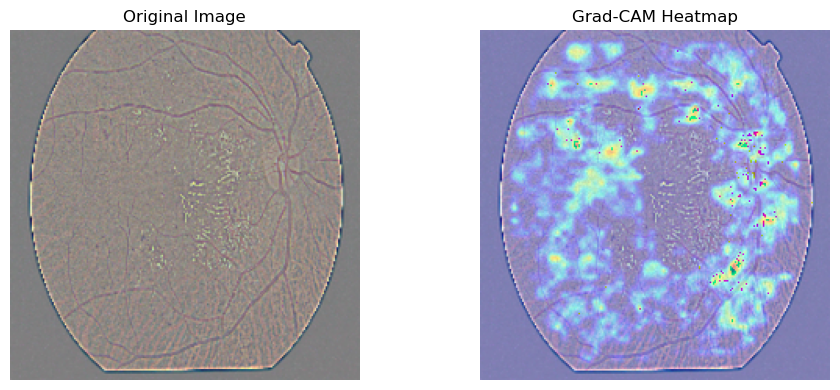

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step

Grad-CAM for class: Severe DR


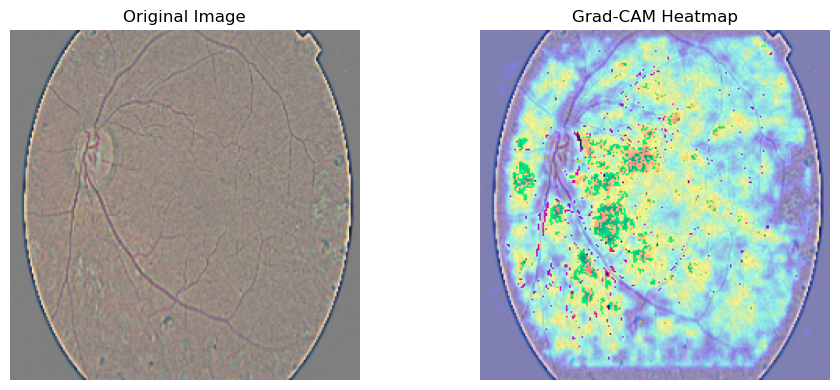

In [116]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model

# ----- Step 1: Rebuild Trained Model Using Functional API -----
inputs = Input(shape=(224, 224, 3))

# Conv layers (confirmed previously: filters=96,64,96)
x = Conv2D(96, (3, 3), activation='relu', padding='same', name='conv2d_3')(inputs)
x = BatchNormalization(name='batch_normalization_3')(x)
x = MaxPooling2D((2, 2), name='max_pooling2d_3')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2d_4')(x)
x = BatchNormalization(name='batch_normalization_4')(x)
x = MaxPooling2D((2, 2), name='max_pooling2d_4')(x)

x = Conv2D(96, (3, 3), activation='relu', padding='same', name='conv2d_5')(x)
x = BatchNormalization(name='batch_normalization_5')(x)
x = MaxPooling2D((2, 2), name='max_pooling2d_5')(x)

# Corrected Dense layer size (64 units instead of 128)
x = Flatten(name='flatten_1')(x)
x = Dense(64, activation='relu', name='dense_2')(x)  # Changed from 128 to 64
x = Dropout(0.5, name='dropout_1')(x)
outputs = Dense(3, activation='softmax', name='dense_3')(x)

# Functional API model compilation
functional_model = Model(inputs=inputs, outputs=outputs)
functional_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ----- Step 2: Transfer trained weights -----
for layer in functional_model.layers:
    if layer.name.startswith("input_layer"):  # skip input layer
        continue
    seq_layer = best_tuned_model.get_layer(layer.name)
    layer.set_weights(seq_layer.get_weights())

print("✅ Weights transferred successfully!")

# ----- Step 3: Grad-CAM Functions -----
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)
    return heatmap.numpy()

def display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

    superimposed_img = heatmap_colored * alpha + img
    superimposed_img = np.uint8(superimposed_img)

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title("Grad-CAM Heatmap")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# ----- Step 4: Generate Grad-CAM -----
DATA_PATH = "../data/"
classes = ["Healthy", "Moderate DR", "Severe DR"]
last_conv_layer_name = "conv2d_5"

for class_name in classes:
    class_folder = os.path.join(DATA_PATH, class_name)
    image_files = [f for f in os.listdir(class_folder) if f.endswith(".png") or f.endswith(".jpg")]
    img_name = random.choice(image_files)
    img_path = os.path.join(class_folder, img_name)

    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array / 255.0, axis=0)

    # Model prediction to initialize
    _ = functional_model.predict(img_array)

    # Compute Grad-CAM heatmap
    heatmap = make_gradcam_heatmap(img_array, functional_model, last_conv_layer_name)

    # Visualize Grad-CAM
    print(f"\nGrad-CAM for class: {class_name}")
    display_gradcam(img_path, heatmap)


**Healthy Class**
- The model focuses on clear, structured areas around the optic disc and vessels, typical of a normal retina. This focused attention aligns with the model’s strong performance on Healthy cases, confirming it has learned key anatomical features well.

**Moderate DR Class**
- Activation is more spread out, especially in central regions, suggesting the model detects early DR signs like microaneurysms or exudates. This matches the high recall and F1-score, showing the model handles Moderate DR fairly well.

**Severe DR Class**
- The heatmap shows widespread, scattered attention with no clear focus, reflecting model confusion. This corresponds to the very low recall and F1-score, indicating poor recognition of Severe DR patterns—likely due to limited or complex training data.

**Further Improvement Needs**
- This could include using more Severe DR examples during training, applying class weighting, or using a pretrained model (like EfficientNet or DenseNet) to provide better feature extraction for complex retinal damage.

# Partially Fine-Tuned Pre-trained Model

I would like to choose EfficinetnetB0 for the following reasons: 
- Designed specifically to be efficient on limited hardware.
- Lightweight, suitable for laptops with limited RAM (8GB).
- Pre-trained on ImageNet, widely used for medical image transfer learning.
| Model Name     | Description                                                                                                    | Suitable for Our Case?           | Reference Link |
|----------------|----------------------------------------------------------------------------------------------------------------|----------------------------------|---------------|
| VGG16/VGG19    | Deep convolutional networks with 16 or 19 layers, known for simplicity and high parameter count.               | No – too resource-intensive      | [1](https://jurnal.yoctobrain.org/index.php/ijodas/article/download/220/227/) |
| ResNet50       | Residual network with 50 layers, uses skip connections for deep learning efficiency.                           | No – still requires more memory/compute than available | [2](https://ceur-ws.org/Vol-3740/paper-160.pdf) |
| InceptionV3    | Deep network with inception modules, optimized for accuracy and efficiency.                                    | Possibly – but may be borderline for low-resource laptops | [3](https://www.digitalocean.com/community/tutorials/popular-deep-learning-architectures-resnet-inceptionv3-squeezenet) |
| MobileNetV2    | Lightweight network designed for mobile and edge devices, uses depthwise separable convolutions.               | Yes           | [4](https://ceur-ws.org/Vol-3740/paper-160.pdf) |
| DenseNet121    | Network with dense connections between layers, efficient parameter usage but still moderately heavy.            | Yes – lighter than VGG/ResNet but heavier than MobileNet | [5](https://ceur-ws.org/Vol-3740/paper-160.pdf) |
| EfficientNetB0 | Model optimized for both accuracy and efficiency, balances width, depth, and resolution.                       | Yes – efficient but MobileNetV2 is lighter for very low resources | [6](https://arxiv.org/pdf/1905.11946.pdf) |



In [123]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants suitable for your hardware (8GB RAM, CPU-only laptop)
IMAGE_SIZE = (224, 224)  # Input size for EfficientNetB0
BATCH_SIZE = 16          # Small batch size to avoid RAM issues

# --- Data generators setup (augmentation for training, rescaling only for validation/test) ---
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,      # Slight rotation for data augmentation
    width_shift_range=0.05, # Small horizontal shift
    height_shift_range=0.05,# Small vertical shift
    zoom_range=0.05,        # Slight zooming
    fill_mode='nearest'     # Filling method for augmented pixels
)

val_test_datagen = ImageDataGenerator(rescale=1./255)  # Only normalization for validation/test data

# Generate training data batches
train_generator = train_datagen.flow_from_dataframe(
    train_df, x_col='filepath', y_col='label',
    target_size=IMAGE_SIZE, batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=True
)

# Generate validation data batches
val_generator = val_test_datagen.flow_from_dataframe(
    val_df, x_col='filepath', y_col='label',
    target_size=IMAGE_SIZE, batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=False
)

# Generate test data batches
test_generator = val_test_datagen.flow_from_dataframe(
    test_df, x_col='filepath', y_col='label',
    target_size=IMAGE_SIZE, batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=False
)

# --- Load EfficientNetB0 pretrained on ImageNet ---
base_model = EfficientNetB0(
    input_shape=(224,224,3),
    include_top=False,     # Exclude original ImageNet classifier
    weights='imagenet'     # Use pretrained weights
)

base_model.trainable = False  # Freeze the base initially (transfer learning)

# --- Add new classification head for our 3-class task ---
inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)         # Feature extraction (frozen)
x = GlobalAveragePooling2D()(x)                # Pooling layer to reduce dimensions
outputs = Dense(3, activation='softmax')(x)    # Output layer for 3 classes
model = Model(inputs, outputs)

# Compile model for initial training
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train classification head first (fast initial training)
model.fit(
    train_generator, epochs=5,
    validation_data=val_generator
)

# --- Fine-tune last few layers of EfficientNet ---
base_model.trainable = True

# Freeze all layers except last 20 layers to allow minimal fine-tuning
for layer in base_model.layers[:-20]:
    layer.trainable = False

# Re-compile the model with a smaller learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tune the model
model.fit(
    train_generator, epochs=5,
    validation_data=val_generator
)

# Save fine-tuned model
model.save('../model/efficientnetb0_finetuned.keras')


Found 1904 validated image filenames belonging to 3 classes.
Found 238 validated image filenames belonging to 3 classes.
Found 238 validated image filenames belonging to 3 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


C:\Users\drthu\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 77s 511ms/step - accuracy: 0.3952 - loss: 1.0828 - val_accuracy: 0.4202 - val_loss: 1.0983
Epoch 2/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 55s 462ms/step - accuracy: 0.3856 - loss: 1.0652 - val_accuracy: 0.4202 - val_loss: 1.0591
Epoch 3/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 54s 449ms/step - accuracy: 0.4088 - loss: 1.0720 - val_accuracy: 0.4202 - val_loss: 1.0552
Epoch 4/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 51s 427ms/step - accuracy: 0.4041 - loss: 1.0612 - val_accuracy: 0.4202 - val_loss: 1.0813
Epoch 5/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 60s 503ms/step - accuracy: 0.4084 - loss: 1.0704 - val_accuracy: 0.3782 - val_loss: 1.0822
Epoch 1/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 119s 727ms/step - accuracy: 0.3955 - loss: 1.1016 - val_accuracy: 0.3782 - val_loss: 1.0838
Epoch 2/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 97s 818ms/step - accuracy: 0.4264 - loss: 1.0827 - val_accuracy: 0.4202 - val_loss: 1.0672
Epoch 3/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 90s 747ms/step - accuracy: 0.4015 - loss: 1.0679 -

- The EfficientNetB0 model reached around 42% validation accuracy after 5 epochs, with minimal improvement across training cycles.
- Training and validation loss fluctuated slightly but stayed close to 1.05–1.08, indicating the model did not learn to distinguish features effectively.
- Despite using a powerful pretrained model, the learning curves suggest underfitting, possibly due to the short training duration (only 5 epochs), frozen base layers, or lack of sufficient fine-tuning.
- The performance plateau and low accuracy suggest the model is defaulting to the dominant class rather than making meaningful distinctions.

C:\Users\drthu\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 259ms/step - accuracy: 0.4269 - loss: 1.0682
Test Accuracy: 0.4202, Test Loss: 1.0693
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 605ms/step
              precision    recall  f1-score   support

     Healthy       0.42      1.00      0.59       100
 Moderate DR       0.00      0.00      0.00        90
   Severe DR       0.00      0.00      0.00        48

    accuracy                           0.42       238
   macro avg       0.14      0.33      0.20       238
weighted avg       0.18      0.42      0.25       238



C:\Users\drthu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\drthu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\drthu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


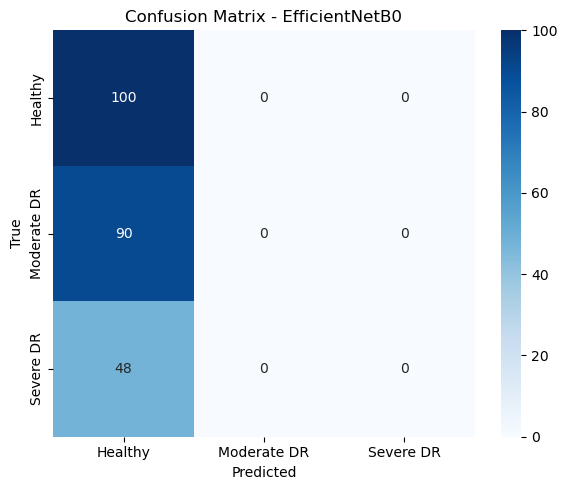

In [130]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate model on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# Predict probabilities on test data
pred_probs = model.predict(test_generator)
y_pred = np.argmax(pred_probs, axis=1)    # Convert probabilities to class indices
y_true = test_generator.classes           # Actual labels from the generator

# Class names
class_labels = list(test_generator.class_indices.keys())

# Display detailed classification report
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - EfficientNetB0')
plt.tight_layout()
plt.show()


- The confusion matrix and classification report confirm that the model predicts only the "Healthy" class, achieving 100% recall for Healthy but completely failing to identify Moderate and Severe DR.
- Precision, recall, and F1-score for both disease classes are all 0, meaning the model is not learning the features necessary to recognize diabetic retinopathy.
- This behavior is common when class imbalance is not handled or when the pretrained model is not fine-tuned.
- Despite using EfficientNetB0, the model currently behaves like a biased classifier and would require class balancing, more epochs, unfreezing layers, and proper augmentation to improve.

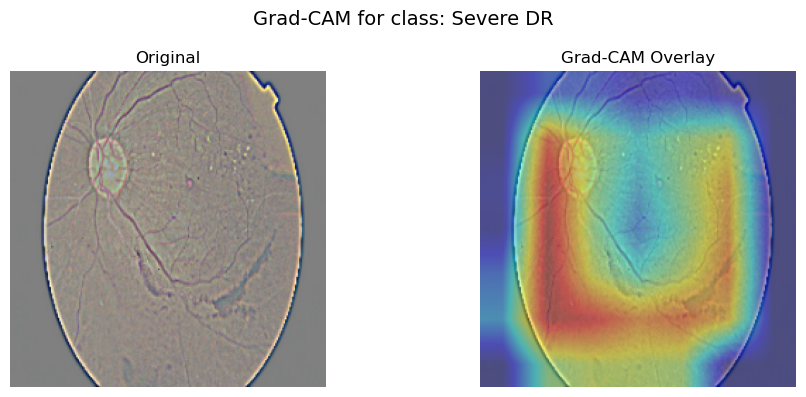

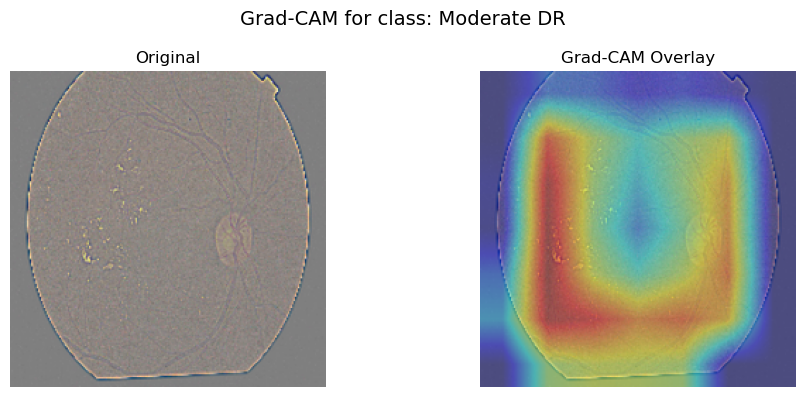

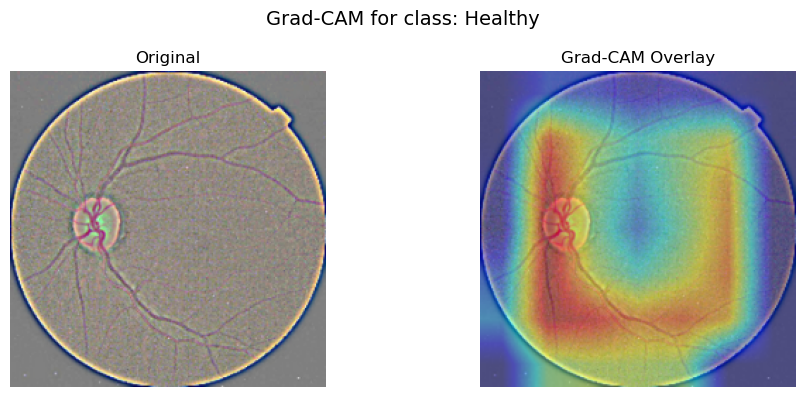

In [146]:
import random
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Grad-CAM heatmap generator 
def make_gradcam_heatmap(img_array, model, base_model, last_conv_layer_name='top_conv', pred_index=None):
    img_array = tf.convert_to_tensor(img_array, dtype=tf.float32)

    # Feature extractor from base model
    last_conv_layer = base_model.get_layer(last_conv_layer_name)
    feature_extractor = tf.keras.Model(inputs=base_model.input, outputs=last_conv_layer.output)

    # Classifier from top_conv to final output
    x = last_conv_layer.output
    for layer in model.layers[2:]:
        x = layer(x)
    classifier = tf.keras.Model(inputs=last_conv_layer.output, outputs=x)

    # Gradient tape for Grad-CAM
    with tf.GradientTape() as tape:
        conv_outputs = feature_extractor(img_array)
        tape.watch(conv_outputs)
        predictions = classifier(conv_outputs)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)
    return heatmap.numpy()

# Display original + Grad-CAM
def display_gradcam(img_path, heatmap, class_name, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    heatmap = cv2.resize(heatmap, (224, 224))
    heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    overlay = cv2.addWeighted(img, 1 - alpha, heatmap_color, alpha, 0)

    plt.figure(figsize=(10, 4))
    plt.suptitle(f"Grad-CAM for class: {class_name}", fontsize=14)

    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.title("Grad-CAM Overlay")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Loop through 3 class names: Healthy, Moderate DR, Severe DR
def display_gradcam_per_class(df, model, base_model, last_conv_layer_name='top_conv'):
    classes = df['label'].unique()
    for class_name in classes:
        sample_df = df[df['label'] == class_name]
        if sample_df.empty:
            print(f"No image found for class '{class_name}'")
            continue
        # Pick one random image from each class
        img_path = random.choice(sample_df['filepath'].tolist())

        # Load + preprocess
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
        img_array = np.expand_dims(np.array(img) / 255.0, axis=0)

        # Generate heatmap
        heatmap = make_gradcam_heatmap(
            img_array=img_array,
            model=model,
            base_model=base_model,
            last_conv_layer_name=last_conv_layer_name
        )

        # Display
        display_gradcam(img_path, heatmap, class_name)

display_gradcam_per_class(test_df, model, base_model)


- Across all three classes — Severe DR, Moderate DR, and Healthy — the Grad-CAM overlays show nearly identical heatmaps, mainly focusing on the outer U-shaped region of the retinal image while ignoring the central features (e.g. macula, optic disc), where signs of diabetic retinopathy usually appear. This consistent and generic activation pattern suggests that the model has not learned class-specific discriminative features, and is likely attending to irrelevant or background regions.

- This aligns with the earlier confusion matrix, where the model classified all images as Healthy, regardless of their true label. The heatmaps provide further evidence that EfficientNetB0, in its current state, is not effectively recognizing or attending to the disease-related retinal abnormalities. Likely causes include: lack of fine-tuning, too few epochs, or frozen base layers that prevent the model from adapting to the medical domain.

# TO SUM UP 
### Model Comparison Summary

| Model             | Accuracy | Strengths                                      | Weaknesses                                               |
|-------------------|----------|------------------------------------------------|-----------------------------------------------------------|
| **Base CNN**      | 0.61     | Performs well on Healthy class                 | Poor generalization; fails on Moderate & Severe DR        |
| **Tuned CNN**     | 0.76     | Improved recall for Moderate DR; stable training | Severe DR still poorly detected; some overfitting signs  |
| **EfficientNetB0**| 0.42     | Recognizes Healthy class with 100% recall      | Fails on both DR classes; non-specific Grad-CAM attention |


- The Base CNN model was overfitting early, showing high training accuracy but poor validation performance and low recall on disease classes.

- The Tuned CNN model showed clear improvements, especially in identifying Moderate DR. However, Severe DR was still often misclassified, suggesting the model struggles with more advanced disease patterns.

- EfficientNetB0, despite being a powerful pretrained model, underperformed due to insufficient fine-tuning. It defaulted to predicting the dominant Healthy class and ignored key DR features, as confirmed by Grad-CAM.

### Recommendations for Further Improvement

I would propose the following to improve the performance:

| Area                                 | Recommendation                                                                                       |
|--------------------------------------|--------------------------------------------------------------------------------------------------------|
| Class Imbalance                      | Apply class weighting or oversample Moderate and Severe Diabetic Retinopathy cases                    |
| Training Duration                    | Train for more epochs using Early Stopping and Learning Rate Scheduling (e.g., ReduceLROnPlateau)     |
| EfficientNet Fine-Tuning             | Unfreeze the top or all layers of EfficientNetB0 and retrain to adapt to the retinal dataset          |
| Data Augmentation                    | Use medical-specific augmentations like zooming, brightness adjustment, and Contrast-Limited Adaptive Histogram Equalization (CLAHE) |
| Loss Function                        | Use Focal Loss to give more importance to hard-to-classify cases, especially Severe Diabetic Retinopathy |
| Domain-Specific Pretrained Models    | Explore pretrained models trained on retinal datasets (e.g., EyePACS or Kaggle Diabetic Retinopathy Challenge data) |
| Attention Mechanisms                 | Add attention modules such as Convolutional Block Attention Module (CBAM) or Squeeze-and-Excitation (SE) blocks |
| Explainability Techniques            | Use Gradient-weighted Class Activation Mapping (Grad-CAM) to visualize and verify model focus         |



----- END ------